# CODING THE RANDOM FOREST ALGORITHM 

MSIN0025 COMPUTATIONAL THINKING - INDIVIUDAL ASSIGNMENT 3  
CODING THE RANDOM FOREST ALGORITHM FROM SCRATCH FOR FRAUD DETECTION IN ONLINE RETAIL STORES

#### Breaking down the problem and outline of the code

THE END GOAL: 

Create an API where a pandas data frame is read into a random forest function which predicts whether transactions are fraudulent or genuine in real time


RANDOM FOREST:

Random forest consists of an ensemble of decision trees creating a forest.
Thus, to create a random forest algorithm, a function for the decision tree classification needs to be developed

The processes of Random Forest:
1. Boostrapping 
2. Random Feature Selection 
3. Aggregation 


OUTLINE OF THE CODE:

1. Load the relevant library and the dataset
2. Visualise, understand, and prepare the data
3. Create a train-test-split function 
4. Build helper functions 
5. Build decision tree function - using the helper functions 
6. Build random forest algorithm (Bagging method) - using the decision tree algorithm and helper functions 
7. Build a function that classifies new unknown data with the trained random forest algorithm 


## IMPORT LIBRARIES 

In [4]:
# Import main libraries for data representation 
import numpy as np
import pandas as pd

# Import plotting libaries to create plots for visualisation 
import matplotlib.pyplot as plt

# Import random for the train test split function and random undersampling 
import random 

# Import pprint that the tree created is easy to read and understand 
from pprint import pprint

# Import for Big O plots and time complexity 
from timeit import repeat      
from functools import partial  
from statistics import mean

## DATA PREPARATION 

#### Load and visualise the data 

In [6]:
# Read in the data as a panda's a dataframe 
# The datapoints are transactions with a 'Class' column stating either fraud (1) or genuine (0) 
df = pd.read_csv("CreditCardFraud1.csv")

In [7]:
# Display first 5 rows of data frame to see what it looks like
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Ensure there are no missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 284807 entries in the dataframe and each column has 284807 non null values. Therefore, there are no missing values so the data is ready to proceed.

In [9]:
# Check the shape of the dataframe: the number of rows and columns  
df.shape

(284807, 31)

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1
Non Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


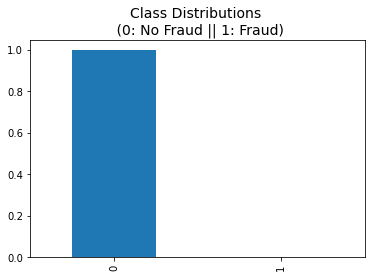

In [10]:
# Find the proportion of fraud cases to non-fraud cases 
# Print the number and percentage of each class, the ratio of non fraud to fraudulent transactions 
fraud_count = df.Class.value_counts()
print('Class 0:', fraud_count[0])
print('Class 1:', fraud_count[1])
print('Proportion:', round(fraud_count[0] / fraud_count[1], 2), ': 1')
print('Non Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

# Visulise on a bar plot the distributions of fraud and non fraud cases 
fraud_class = df.Class.value_counts(normalize=True)
fraud_class.plot(kind="bar")
title = plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

The bar plot shows large imbalance between the two classes. This can cause overfitting.  

To solve this issue need to use Random Under-sampling


## TEST-TRAIN-SPLIT 

In [11]:
# Define the function as test-train-split and call the data frame and test size as the inputs 
# Test size states how big the test data frame should be 
# The function should output a training data frame and a test data frame 
# We want to randomly select a certain number of rows which then constitute our test data frame

def train_test_split(df, test_size):
 
    # Build in something into this function the tests if that test size is an actual number or a proportion
    # Check if the test size is a float (proportion)
    # If it is a float, calculates the number of rows the proportion represents
    # Round this number in case the new product is also a float 

    if isinstance(test_size, float): 
        test_size = round(test_size * len(df))

        # Access all the numbers from the row index 
        # Transform it to a python list (from a range index object) by using the tolist() method
        # Created a Python list that contains all the indices from the dataframe 
        # Randomly pick numbers from the indices variable using the sample function 
        # Set population as the list of all indices and 'k' as the number of elements to sample
        # These random  numbers are the test indices that form the test data frame 
        
        indices = df.index.tolist()
        test_indices = random.sample(population=indices, k=test_size)

        # Use the loc attribute to give access to certain rows to create the test dataframe 
        # Create the training dataframe by dropping all the test indices using the drop attribute
        
        test_df = df.loc[test_indices]
        train_df = df.drop(test_indices)
    
    return train_df, test_df

In [12]:
# If you create a new test df, it contains different row indices
# Set a random seed to make sure the same pseudo-random numbers are used when the function is run 
random.seed(0)
train_df, test_df = train_test_split(df, test_size = 0.2)

In [13]:
# Print out the length of the dataframe, the test dataframe and the train dataframe 
# This tell us how many rows are in each dataframe 
print('Original dataframe:', df.shape)
print('Test dataframe:', test_df.shape)
print('Train dataframe:', train_df.shape)

Original dataframe: (284807, 31)
Test dataframe: (56961, 31)
Train dataframe: (227846, 31)


In [14]:
# Check the first 5 rows of the test data frame 
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201979,134121.0,-0.058307,-3.799403,-2.078795,0.697363,-0.436768,2.157428,0.567169,0.349683,0.812159,...,0.256740,-1.373465,-0.380311,-0.925985,-1.147998,0.120203,-0.196370,0.107351,1017.00,0
220500,142199.0,-0.325062,0.514898,0.414367,0.063688,1.695304,5.194425,-2.061910,-1.349628,-0.255212,...,-1.282401,0.241857,-0.215761,0.669220,1.304034,-0.333826,0.108868,0.192635,25.81,0
21225,31545.0,-0.569233,0.593262,1.003253,1.023150,0.788303,0.905889,0.351832,0.298407,-0.350706,...,0.001946,0.105444,-0.254847,-1.035605,-0.082928,-0.201822,0.034395,0.152500,28.00,0
135746,81381.0,1.049991,-0.235876,0.830567,0.499914,-0.408757,0.715076,-0.583276,0.337162,0.286887,...,0.213674,0.799577,-0.071636,-0.187055,0.291309,0.644279,0.018601,0.004898,28.00,0
268055,163038.0,-0.128164,0.663256,0.993301,-0.682403,-0.232496,-0.744332,0.298319,0.048584,0.968092,...,-0.087866,-0.170249,0.084759,-0.119093,-0.598972,-0.989638,0.234198,0.125375,1.00,0


## RANDOM UNDER SAMPLING 

The dataframe needs to be balanced to avoid overfitting. Thus, the number of points that are in majority are decreased. This process is known as random under sampling. 

Given that there are 492 examples of fraud, the ratio for training the algorithm will be set to 10:1 (non-fraud: fraud).


In [15]:
# Count each of the classes 
count_class_0, count_class_1 = train_df.Class.value_counts()

# Divide the orginal dataframe into two by class
# This creates a dataframe with all fraud transactions and all non-fraud transactions
df_class_0 = train_df[train_df['Class'] == 0]
df_class_1 = train_df[train_df['Class'] == 1]

In [16]:
# Using sample function from random library
# Randomly select 10 times the number of fraud cases in the train dataframe
# Combine the fraud dataframe with the undersampled non-fraud dataframe 
# Call the new dataframe train_df_under

df_class_0_under = df_class_0.sample(count_class_1*10)
train_df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
0    3980
1     398
Name: Class, dtype: int64
Proportion: 10.0 : 1


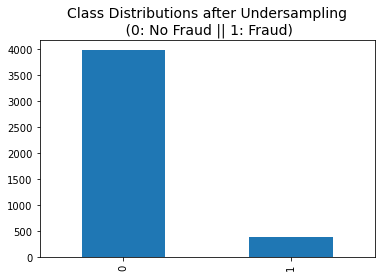

In [13]:
# Find the new proportion of fraud cases to non-fraud cases after random undersampling 
# Print the new number of each class 
# Print the new ratio of non fraud to fraudulent transactions 

fraud_count_under = train_df_under.Class.value_counts()
print('Random under-sampling:')
print(train_df_under.Class.value_counts())
print('Proportion:', round(fraud_count_under[0] / fraud_count_under[1], 2), ': 1')

# Visulise on a bar plot 

fraud_count_under.plot(kind='bar')
title = plt.title('Class Distributions after Undersampling\n (0: No Fraud || 1: Fraud)', fontsize=14)

## HELPER FUNCTIONS 

The helper functions will be used to code the decision tree algorithm. Refer to report for chart that explains the need for each function. 

#### Introducing the main functions

Helper functions:
1. check_purity:
Tests whether the data is pure (whether it only has one class) 
2. classify_data: Return the different classifications of data 
3. get_potential_splits:
Generates all the potential splits that a node can split on. Adding in random subspace method for RF.  
4. spit_data:
Peforms the split to send data down one branch or the other 
5. determining_best_split: 
Determines the split that results in the lowest overall entropy (measure of impurity) using calculate entropy function and calculate overall entropy function 

#### Changing the representation of the data 

In [17]:
# Storing the Pandas' dataframe as a NumPy 2d array 
# Using a NumPy 2d array as its faster to run than Pandas data frame
# This removes additional information: column names and row indices
# Always call NumPy 2d array 'data' and Pandas' as 'df' for clear interpretation of code 

# Print out first 5 rows to show the new layout 
# Print out the last row of the new data 

data = train_df_under.values
print(data[:5])
print(data[:,-1])

[[ 3.46620000e+04  1.28046239e+00  4.99815732e-01 -1.92508688e+00
   3.34537204e-01  2.60327506e+00  3.06190533e+00 -3.42884605e-01
   7.87826399e-01 -2.25470906e-01 -6.80767850e-01  4.01451218e-01
  -3.76663635e-01 -1.08219018e-01 -1.52452053e+00  1.32554655e+00
   1.11254689e+00  5.60241357e-01  1.24303639e+00 -3.97518809e-01
   3.46329297e-02 -9.34611488e-02 -3.43483282e-01 -1.73534700e-01
   8.37323110e-01  8.35888374e-01 -2.64137013e-01  4.51803210e-02
   5.83496757e-02  1.00000000e+00  0.00000000e+00]
 [ 1.40340000e+04 -2.21817827e+00  1.74165680e+00 -1.49001230e+00
  -2.27050545e-01  2.17197768e+00  3.37241816e+00  1.37580508e-01
   1.01144089e+00  1.35241075e+00  1.02825696e+00  6.67964808e-01
  -2.62102743e+00  1.66057403e+00  1.85994714e+00  4.27727473e-01
  -9.00979125e-02  1.84641365e-01  6.06642228e-01  5.83642949e-01
   2.48167549e-01 -3.01091810e-01 -2.23872960e-01  1.18351548e-01
   9.33511593e-01  2.16914714e-01 -3.78233620e-01  3.15771791e-01
   5.66641872e-01  6.3070

### 1. Check Purity  

In [20]:
# Check if a partition of the data contains one class (pure) or contains several classes (not pure)
# The aim is to determine how many classes there are in the data
# Input of the function is the data (NumPy Array)
# Function should return the Boolean (True for pure data and False for not pure data)

def check_purity(data):
    
    # Access the last column where the classes are stated by Indexing the data (NumPy 2d array) 
    # Specify all rows using colon, and the last column using -1 
    # Store this in a variable called class_column
    # Identify the unique classes in the array using NumPy function called unique 
    # Store this array in a variable called unique_classes
   
    class_column = data[:,-1]
    unique_classes = np.unique(class_column) 
    
    # Print variables unique_classes and length of unique classes
    'These variable have not been printed as doing so returns them in the decision tree and random forest outputs'
    'This slows down the functions and provides large quanities of unnecessary information later on'
    
#     print(unique_classes)
#     print(len(unique_classes))
    
    # Using the len() method, test if the length of the unique classes array is equal to one 
    # If yes, the data is pure so return True, if else False is returned
    
    if len(unique_classes) == 1:
        return True
    else:
        return False

In [21]:
check_purity(data)

False

### 2. Classify Data 

In [22]:
# The goal is to return a classification where the classification is the class that appears most often 
# Input of the function is the data (NumPy Array)
# The classification should be a string that returns either 0 or 1

def classify_data(data):
    
    # Determine the unique values and how often they appear by accessing the class column
    # Use NumPy's unique function, passing in the return counts argument to return 2 arrays 
        # (1) The unique class values, (2) How often they appear
    # Store first array as variable unique_classes and the second array as counts_unique_classes 
    
    class_column = data[:,-1]
    unique_classes,counts_unique_classes = np.unique(class_column, return_counts=True)
    
    # Print the unique classes and their respective quantities
    'These variable have not been printed as doing so returns them in the decision tree and random forest outputs'
    'This slows down the functions and provides large quanities of unnecessary information later on'
    
#     print(unique_classes)
#     print(counts_unique_classes)

    # Determine the index of the largest value of the counts_unique_classes variable using argmax method
    # Store this largest count as a variable called index 
    # Use index variable to index the unique classes array to get the name of the class that appears most often
    # Store this as classification and return classification
    
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [23]:
classify_data(data)

0.0

### 3. Potential Splits 

This function needed a random subspace parameter to introduce random feature selection aspect of Random Forest. It's default is set to None, meaning the decision tree function would run as normal. 

In [24]:
# Create a function that returns all potential splits as a dictionary
# Input the data and random subspace parameter in the function 
# Random Subspace parameter faciliates the RANDOM FEATURE SELECTION of random forest
# Set default to None so decision tree function can run as normal

def get_potential_splits(data, random_subspace=None):
    
    # Create the empty dictionary where keys will be column indices and values will be potential splits
    # Create a variable that stores the number of columns  
    
    potential_splits = {}
    _, n_columns = data.shape
    
    # Create an entry in the potential splits dictionary for each column 
    # Create a list that contains the column indices 
    # Excluding the last column which is the class
    
    column_indices = list(range(n_columns - 1))
     
    # Randomly select column indices for the feature subspace
    # If there is a random subspace input and if random_subspace is less than or equal to the number of columns
    # Use the sample function to select 'k' columns 
    
    if random_subspace and random_subspace <= len(column_indices):
        random_column_indices = random.sample(population = column_indices, k = random_subspace)
    
    # Loop through all the random column indices 
    # Determine all the values for that particular feature/ column from the data
    # Create a unique value array for each randomly selected column 
    # This determines the potential splits
    
    for column_index in random_column_indices:        
        values = data[:, column_index]
        unique_values = np.unique(values)

        # Store the unique values and column indices in the potential splits dictionary
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

In [25]:
get_potential_splits(data, 4)

{15: array([-4.49894468, -3.88569354, -3.6423926 , ...,  2.8644989 ,
         2.92706021,  4.82457743]),
 12: array([-18.68371463, -18.04759657, -17.76914346, ...,   3.69210135,
          3.75364091,   4.13354208]),
 29: array([0.00000e+00, 1.00000e-02, 5.00000e-02, ..., 6.13021e+03,
        6.98267e+03, 8.78700e+03]),
 9: array([-13.43406632, -13.32015469, -11.12662352, ...,   5.96667048,
          6.02646871,   9.23462345])}

### 4. Split Data

In [29]:
# Create a function that splits the data on a feature and value (the inputs)
# Return two 2-D NumPy arrays
# One array containing all points below the split and another containing all points above the split   

def split_data(data, split_column, split_value):
    
    # Access all rows but pass in the split column to get the particular column 
    # Store this array in a variable called split column values 
    
    split_column_values = data[:, split_column]
    
    # Determine which values are below and above the split point 
    # The comparison returns a Boolean array
    # Use this Boolean array to index the data 
    
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [32]:
data_below, data_above = split_data(data, 2, 1.78)
print(data_below)
print(data_above)

[[ 3.46620000e+04  1.28046239e+00  4.99815732e-01 ...  5.83496757e-02
   1.00000000e+00  0.00000000e+00]
 [ 1.40340000e+04 -2.21817827e+00  1.74165680e+00 ...  5.66641872e-01
   6.30700000e+01  0.00000000e+00]
 [ 1.35028000e+05 -7.33090648e-01  1.67469972e+00 ...  1.78322643e-01
   1.19950000e+02  0.00000000e+00]
 ...
 [ 1.69351000e+05 -6.76142671e-01  1.12636606e+00 ...  1.94361479e-01
   7.78900000e+01  1.00000000e+00]
 [ 1.69966000e+05 -3.11383161e+00  5.85864172e-01 ... -2.53700319e-01
   2.45000000e+02  1.00000000e+00]
 [ 1.70348000e+05  1.99197610e+00  1.58475887e-01 ... -1.53088128e-02
   4.25300000e+01  1.00000000e+00]]
[[ 1.42114000e+05 -1.85583045e+00  1.90022957e+00 ... -4.34288299e-02
   1.54100000e+01  0.00000000e+00]
 [ 6.10920000e+04 -2.31498195e+00  1.86396378e+00 ...  1.50686860e-01
   9.03000000e+00  0.00000000e+00]
 [ 1.41862000e+05 -3.65632811e+00  2.99069518e+00 ... -2.06696172e-01
   3.69800000e+01  0.00000000e+00]
 ...
 [ 1.60870000e+05 -6.44277679e-01  5.0023524

### 5. Lowest Overall Entropy 

Entropy is the measure of impurity or a measure of how 'messy' the data is. When splitting the node, the point with the lowest overall entropy maximises information gain, thus is the best point to split on. 


To calculate lowest overall entropy:
1. Write a function that calculates entropy 
2. Write a function that calculates overall entropy 
3. Write a function that finds the lowest overall entropy in the data 

#### 5.1 Calculate Entropy 

In [33]:
# Create a function that calculates entropy for a partition of the data 
# Input data 

def calculate_entropy(data):
    
    # Access the class column
    # Determine each class' counts (how often they appear)
    
    class_column = data[:, -1]
    _, counts = np.unique(class_column, return_counts=True)
    
    # Determine the probabilities of each class appearing 
    # Divide the individual class' count by total counts
    # Use the probabilities to calculate entropy using the formula
    # The first element of the probabilities array is multiplied by 
    # the first element of the negative of the logarithm base two of those probabilities 
    # and so on… to create a new array

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [34]:
calculate_entropy(data)

0.4394969869215134

#### 5.2 Calculate Overall Entropy 

In [35]:
# Create a function to calculate the overall entropy of data above and below a split
# Input data above and below as parameters

def calculate_overall_entropy(data_below, data_above):
    
    # Determine the p-values/ weights for the inputs 
    # Divide the number of datapoints in the data above or below by total length of data
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    # Use the calculate entropy function previously defined 
    # Calculate the overall entropy by adding the weights of data above and below
    
    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [36]:
calculate_overall_entropy(data_below, data_above)

0.31512040610271325

#### 5.3 Calculate Lowest Overall Entropy (The Best Split)

In [39]:
# The function's purpose is to consider all the potential splits from the potential splits dictionary 
# and determine the one split that results in the lowest overall entropy
# Input the potential splits dictionary and the data 
# The function returns the parameters for best split column and value

def determine_best_split(data, potential_splits):
    
    # Create a variable called overall entropy and set it to an arbitrarily high value 
    # Loop over all the potential splits dictionary - over all the columns and values 
    # For each potential split calculate the overall entropy
    # Store this function as current overall entropy 
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            # Check if the current overall entropy is less than or equal to the initial overall entropy 
            # If yes, update the overall entropy variable to current overall entropy 
            # Store the parameters of the split into best split column and best split value 
            
            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index 
                best_split_value = value
    
    return best_split_column, best_split_value

In [40]:
potential_splits = get_potential_splits(data, 4)
determine_best_split(data, potential_splits)

(9, -2.26877058844813)

## DECISION TREE ALGORITHM  

#### Creating a representation of the decision tree 

In [41]:
# Use a dictionary to represent subtrees
# The whole tree will be made up of such dictionaries 

sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}
print(sub_tree)

{'question': ['yes_answer', 'no_answer']}


### Decision Tree Algorithm 

In [48]:
# Define the decision tree algorithm function 
# Functions parameters are the dataframe, counter and parameters for pruning the tree
# The function outputs a tree made up of many subtrees 

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5, random_subspace=None):
    
    # DATA PREPARATIONS 
    # convert Pandas df input to NumPy's 2-D array on the first call of the function
    # Ask the question with the feature name rather than column index
    # Specify the column headers variable as a global variable so when the counter is increased by 1 it remains 
    
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    # BASE CASES 
    # Introduce 3 conditions where the base case is called 
    # Each base case returns a Boolean - true or false 
    # If any base case returns True call the classify function to return the tree's classification 
    # If returns False, enter the recursive part of the function   
    
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    # RECURSIVE PART
    # Increase counter by one 
    
    else: 
        counter += 1

        # Run the helper functions 
        potential_splits = get_potential_splits(data, random_subspace)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # Access the feature names 
        # Create a variable called question 
        # Use string method format to pass in placeholders for feature and value for the question 
        # Instantiate the sub-tree dictionary where the key is the question and the value is an empty list 
        
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # Find the answer to the question
        # Append yes or no answers in the empty list 
        # 'Yes answers' are for data below the split point and 'No answers' are for data above
        # Rerun the decision tree function until a base case is reached
        # Continually appending yes or no answers in the empty list
        
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, random_subspace)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, random_subspace)
        
        # Check if the answers are the same 
        # If answers are the same assign to the 'Yes answer'
        # If answers are not the same append answers into the respective lists 
        # Answers can be the same when the data is classified even though it is not pure yet but a base case is reached
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [49]:
tree = decision_tree_algorithm(train_df_under, random_subspace=4)
pprint(tree)

{'V4 <= 1.6753817784345': [{'V10 <= -2.24811517395215': [{'V19 <= -0.166565562809025': [{'V6 <= -0.574679962140979': [{'Time <= 132086.0': [1.0,
                                                                                                                                            0.0]},
                                                                                                                      0.0]},
                                                                                        {'V3 <= -0.612034894995233': [{'V18 <= 0.450098503348706': [1.0,
                                                                                                                                                    0.0]},
                                                                                                                      0.0]}]},
                                                         0.0]},
                           {'V8 <= 0.936536990180261': [{'V12 <= -2.71873063246571':

### Decision Tree Prediction 

#### Prediction for one example transaction 

In [50]:
# Set row indice of test dataframe as the example point to classify
example = test_df.iloc[1]
example

Time      142199.000000
V1            -0.325062
V2             0.514898
V3             0.414367
V4             0.063688
V5             1.695304
V6             5.194425
V7            -2.061910
V8            -1.349628
V9            -0.255212
V10           -0.912193
V11           -0.217281
V12            0.284028
V13           -0.265816
V14            0.478753
V15            1.525736
V16            0.303986
V17           -0.334460
V18            0.321439
V19           -0.063876
V20            0.793929
V21           -1.282401
V22            0.241857
V23           -0.215761
V24            0.669220
V25            1.304034
V26           -0.333826
V27            0.108868
V28            0.192635
Amount        25.810000
Class          0.000000
Name: 220500, dtype: float64

In [51]:
# Create a function that classfies one example point 
# Input an example point to be passed through the decision tree

def predict_example(example, tree):
    
    # Access the question from the decision tree that was created in the previous function
    # Use the keys method to transform the dict key object to a list 
    # Index the list to get a string 
    # Access indiviudal elements of the question (feature name, comparison operator, value) 
    # Use the string method to split the string based on thoes elements 
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # Ask the question about the example point (is the example points's feature less than or equal to value)
    # Convert the value element from a string to a float 
    # If the answer is yes, pick the first element of the list
    # If the answer is no, pick the second element of the list
    # Assign variable names to answer 
    
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # BASE CASE
    # Stop the function calling itself when the answer is not a dictionary
    # Thus the answer is a class and classification is returned 
    
    if not isinstance(answer, dict):
        return answer
    
    # RECURSIVE PART
    # Change variable answer to residual tree 
    # This makes it clear the residual tree is the next subtree the example point is called through
    # Rerun the predict example function until the answer is not a dictionary 
    
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [52]:
predict_example(example, tree)

0.0

#### Prediction for all test data frame transactions 

In [53]:
# Predicting all example of the test data 
# Input the test dataframe and the tree defined from the decision tree function 
# Use the predict example function 
# Use apply method to apply the predict example function to all rows in test Dataframe

def decision_tree_predictions(test_df, tree):
    predictions = test_df.apply(predict_example, args=(tree,), axis=1)
    
    return predictions 

In [54]:
decision_tree_predictions(test_df, tree)

201979    0.0
220500    0.0
21225     0.0
135746    0.0
268055    0.0
         ... 
116168    0.0
160562    0.0
270749    0.0
162574    0.0
96834     0.0
Length: 56961, dtype: float64

In [55]:
tree_predictions = decision_tree_predictions(test_df, tree)

#### Calculate accuracy of decision tree algorithm

In [56]:
# Create a function to determine the accuracy of the predictions 
# Compare the predictions to the class label in the dataframe 

def calculate_accuracy_tree(df, tree):

    # Create two new columns 
    # 1. the predicted classifications 
    # 2. whether the classifications were correct or not (Boolean array)
    # The latter column is created by comparing predicted classifications to the class label 
    # Taking the mean of the Boolean array returns the accuracy 
    
    df["classification"] = tree_predictions 
    df["classification_correct"] = df["classification"] == df["Class"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [57]:
calculate_accuracy_tree(test_df, tree)

0.9949263531188006

In [58]:
# Determining which have been misclassified 
test_df[test_df['classification_correct']==False]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,classification,classification_correct
74708,55714.0,-1.332696,-0.439609,-1.304924,-4.560938,2.760633,1.996803,-0.015418,1.127049,1.148902,...,-0.306599,1.035670,0.629465,-1.020216,0.009225,-0.058277,26.31,0,1.0,False
114679,73576.0,-0.977742,0.182005,2.324500,-3.815736,-0.953795,-1.246033,0.178910,0.120496,2.081161,...,-0.444615,0.373318,0.716228,-0.858079,0.334664,0.130399,12.93,0,1.0,False
36939,38741.0,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50,0,1.0,False
150955,94228.0,1.938309,0.554785,-2.207288,2.764293,3.173387,3.941817,-0.207818,0.766973,-0.164670,...,0.338262,0.566644,-0.131762,-0.269085,-0.063442,-0.060852,7.73,0,1.0,False
20631,31168.0,0.719337,1.559219,-1.624824,1.771940,0.787594,-1.746675,0.802483,-0.110579,-0.205136,...,0.190915,0.227022,-0.645216,-0.400362,0.266789,0.014327,0.70,0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151805,96288.0,-0.403697,1.346051,2.400957,2.903068,0.901288,0.432906,1.015303,-0.347772,0.386491,...,0.028802,-0.199918,-0.748784,-0.647896,-0.352992,-0.282273,2.27,0,1.0,False
151503,95603.0,-1.440318,1.625013,0.727442,3.505076,2.586446,0.882507,0.839925,0.325225,-0.812579,...,0.190202,-1.425966,0.297356,-0.070712,-0.032435,0.090989,3.09,0,1.0,False
149225,90838.0,-0.280638,1.792652,0.028446,2.902091,2.824803,1.478560,1.262294,-0.008235,-0.352340,...,0.061021,-1.899668,-1.261876,-0.480449,-0.223576,-0.187571,2.06,0,1.0,False
151053,94480.0,1.900326,1.232941,-1.487665,4.403575,0.901853,-0.802997,0.317888,-0.210026,0.345249,...,0.335607,-0.360894,-0.314426,-0.379559,-0.037028,0.009913,7.82,0,1.0,False


## RANDOM FOREST ALGORITHM 

### Creating a Bootstrapped Dataset 

In [59]:
# Define the bootstrapping function that outputs different bootstrapped datasets 
# Input the training dataframe and the number of rows for the bootstrapped dataset

def bootstrapping(train_df, n_bootstrap):
    
    # Create random incides from the train datast 
    # Index the training data frame with the random bootstrapped indices 
    # Use the iloc function to pass in these random indices 
    
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

In [60]:
bootstrapping(train_df_under, n_bootstrap=len(train_df_under))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141132,84138.0,-1.700420,-0.907089,1.878407,0.786988,1.323920,-0.810068,-0.367122,0.251885,-0.478960,...,0.012143,-0.404233,0.105879,0.024485,0.377872,0.404861,-0.043432,0.087731,61.00,0
32311,36741.0,1.431872,-0.913608,-0.597578,-1.809101,1.023776,3.530803,-1.601104,0.930262,-0.543200,...,0.328639,0.760098,-0.138166,1.049177,0.589980,-0.034250,0.040648,0.019118,11.00,0
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
152779,97463.0,2.012970,-0.374130,0.002449,0.405971,-0.614445,-0.049808,-0.915282,-0.072426,2.565988,...,-0.146644,0.021096,0.228660,-0.660914,-0.498326,0.479617,-0.034489,-0.047837,15.95,0
28862,35202.0,0.945461,-0.504096,1.218597,0.750697,-0.584213,1.509341,-1.032159,0.727466,1.104608,...,0.040964,0.363596,0.204506,-0.638636,-0.157073,0.428731,0.077084,0.014971,21.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272691,165219.0,-2.264534,2.758245,-1.690299,0.883691,-0.391226,-0.806137,-0.056669,1.526291,-1.172337,...,0.255207,0.752841,-0.117961,0.053635,0.255474,-0.379734,0.273429,0.144607,13.98,0
101469,67843.0,-0.762964,1.031944,1.009958,0.142198,-0.253140,-0.286786,0.139552,0.503652,0.095922,...,-0.019017,0.135461,-0.199401,-0.099414,-0.058075,0.399651,0.231108,0.128442,3.79,0
72757,54846.0,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,...,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,1.79,1
187557,127585.0,-0.732515,-0.706904,0.212513,-0.470885,2.966124,3.853838,-1.004924,1.321203,0.332905,...,0.218454,0.281267,0.281680,0.644701,-0.450344,-0.791626,0.134564,0.102212,45.00,0


### Creating The Forest/ Ensemble of Trees

In [61]:
# Create the random forest algorithm function 
# Input the training dataframe, length of bootstrap dataframe, number of features, number of trees, max depth
# The function outputs the forest 

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    
    # Create an empty list called forest which will contains all the decision trees
    # For each decision tree create a bootstrapped dataset and input this into the decision tree algorithm 
    # Append each decision tree into the forest list 
    
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

In [62]:
forest = random_forest_algorithm(train_df_under, 5, len(train_df_under), 5, 4)
pprint(forest)

[{'V12 <= -3.27270458494442': [{'V18 <= -0.936814652613817': [{'V16 <= -1.81591431259746': [1.0,
                                                                                            0.0]},
                                                              {'V20 <= 0.208401576333018': [{'V11 <= 1.11663268034051': [0.0,
                                                                                                                         1.0]},
                                                                                            {'V7 <= 0.948701404286247': [1.0,
                                                                                                                         0.0]}]}]},
                               {'V11 <= 2.60284976906526': [0.0,
                                                            {'V14 <= -2.97131675769274': [1.0,
                                                                                          0.0]}]}]},
 {'V14 <= -2.95382425341893': [

### Random Forest Predictions 

In [63]:
# Determine the predictions from the random forest algorithm 
# Input testing dataset and the constructed forest from the previous function

def random_forest_predictions(test_df, forest):
    
    # Create a dictionary for the predictions 
    # The dictionary has tree numbers as the keys and predictions as the values
    # Loop over all the trees in the forest 
    # Determine the predictions using the decision tree predictions function 
    # Add the predictions to the dictionary
    
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    # Transform the dictionary into a dataframe with each tree as a columns  
    # Calculate predictions by taking the mode across each row 
        
    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [64]:
random_forest_predictions(test_df, forest)

201979    0.0
220500    0.0
21225     0.0
135746    0.0
268055    0.0
         ... 
116168    0.0
160562    0.0
270749    0.0
162574    0.0
96834     0.0
Name: 0, Length: 56961, dtype: float64

## CALCULATE ACCURACY 

In [65]:
predictions = random_forest_predictions(test_df, forest)

In [66]:
# Calculate the accuracy of the predictions 
# Same function used to calculate the accuracy of the decision tree algorithm 

def calculate_accuracy_rf(df, forest):

    # Create the two new columns: (1) predictions classifications, (2) Boolean array if correct or not
    # Take the mean of the Boolean array for the accuracy 
    
    df["classification"] = predictions 
    df["classification_correct"] = df["classification"] == df["Class"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [67]:
calculate_accuracy_rf(test_df, forest)

0.9991924299081828

In [68]:
# Determining which points have been misclassified 
test_df[test_df['classification_correct']==False]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,classification,classification_correct
152949,97636.0,1.898575,1.760156,-2.580334,4.433557,1.740047,-0.734451,0.395292,-0.189309,-0.317265,...,-0.059996,-0.827262,0.121577,0.102068,-0.008865,0.040645,0.00,0,1.0,False
211925,138631.0,-17.919489,-14.472984,-3.301571,2.570114,2.934969,1.243204,5.022329,-3.754375,5.409756,...,4.900749,-0.466434,2.820430,0.674716,-1.351051,6.403911,432.48,0,1.0,False
9583,14412.0,-0.343551,2.237135,-0.068572,1.343750,1.223217,-1.934534,1.442605,-0.495141,0.011493,...,-0.320767,0.562513,0.337318,-0.411966,0.075454,0.139390,0.89,0,1.0,False
95534,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1,0.0,False
233258,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1,0.0,False
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1,0.0,False
173544,121530.0,-5.263419,-1.982211,-6.773362,-0.769729,-20.399897,14.793318,21.290897,-4.144429,0.350294,...,-0.691365,-1.039764,0.287466,0.914333,2.853979,-1.003876,4377.98,0,1.0,False
16851,28233.0,-0.459787,2.869443,-5.412617,3.893741,-1.920080,-2.759995,-4.260113,0.878554,-2.636499,...,-0.281806,-0.057908,1.077772,-0.198859,1.163969,0.610418,1.00,0,1.0,False
17592,28818.0,-2.181281,3.422398,-6.628457,4.096195,-2.558534,-2.902141,-4.627348,1.783160,-2.689058,...,0.049511,-0.063265,-0.158701,-0.297131,1.348460,0.330177,89.99,0,1.0,False
13624,24145.0,-12.583023,8.919984,-16.432577,6.063380,-10.328988,-3.855379,-12.454570,8.564943,-2.969611,...,-0.414904,0.021591,0.723208,-0.280377,1.791834,0.569150,89.99,0,1.0,False


## OUTCOME 

At the beginning of the code, the END GOAL was stated: 
'Create an API where a pandas data frame is read into a random forest function which predicts whether transactions are fraudulent or genuine in real time'


Using these functions, the Random Forest algorithm will run on a given Pandas datset. It will classify transaction data as either non-fraud (0) or fraud (1). 

In [ ]:
forest = random_forest_algorithm(train_df=train_df_under, n_trees=4, n_bootstrap=len(train_df_under), n_features=5, dt_max_depth=3)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy_rf(test_df, forest)
print(predictions)
print(accuracy)

## TESTING COMPLEXITY: RUN TIMES AND BIG O PLOTS 

This section will:
1. Prepare data for Big O plots 
2. Investigate how input sizes effect the training time complexity of the random forest algorithm function
3. Investigate how input sizes effect the run time complexity of the random forest prediction function 

#### Varying the number of records to change the input size using random undersampling 

The random forest algorithm function has undersampled training data as its input. This training data had 398 fraud transactions and non-fraud transactions were randomly undersampled to balance the dataset. The original undersampled training dataframe has a 10:1 ratio. 

This technique will be used again - creating different ratios to vary the input size. 


The numer of records will vary to:
1. Original: 398 * 10 = 3980 
2. Dataframe 2: 398 * 5 = 2388 
3. Dataframe 3: 398 * 15 = 6368 
4. Dataframe 4: 398 * 20 = 8358 
5. Dataframe 5: 398 * 25 = 10348 


The number of records in the testing dataset has thus far been 56,961. This number will be varied in intervals of 2500 to determine the run time on different input sizes (irrespective of fraud cases as this doesn't affect timing output or random forest algorithm). 

#### Data preparation for calculating computational complexity 

In [69]:
# Repeat codes from random undersampling section 
# Each class is counted and then divided into two dataframes by class

count_class_0, count_class_1 = train_df.Class.value_counts()

df_class_0 = train_df[train_df['Class'] == 0]
df_class_1 = train_df[train_df['Class'] == 1]

In [70]:
# Using sample function from random library
# Randomly select varying number of fraud cases in the train dataframe to undersample 
# Combine the undersampled non-fraud dataframe with the fraud dataframe 

df_class_0_under = df_class_0.sample(count_class_1*5)
train_df_under_2 = pd.concat([df_class_0_under, df_class_1], axis=0)

df_class_0_under = df_class_0.sample(count_class_1*15)
train_df_under_3 = pd.concat([df_class_0_under, df_class_1], axis=0)

df_class_0_under = df_class_0.sample(count_class_1*20)
train_df_under_4 = pd.concat([df_class_0_under, df_class_1], axis=0)

df_class_0_under = df_class_0.sample(count_class_1*25)
train_df_under_5 = pd.concat([df_class_0_under, df_class_1], axis=0)

In [71]:
# Print the shape of each dataframe to see their sizes 

print('Shape of dataframe no.2:',train_df_under_2.shape)
print('Shape of dataframe no.3:',train_df_under_3.shape)
print('Shape of dataframe no.4:',train_df_under_4.shape)
print('Shape of dataframe no.5:',train_df_under_5.shape)

Shape of dataframe no.2: (2388, 31)
Shape of dataframe no.3: (6368, 31)
Shape of dataframe no.4: (8358, 31)
Shape of dataframe no.5: (10348, 31)


#### Big O Plots for the Random Forest Algorithm: Train time complexity 

For different inputs, vary their sizes and determine their running times. 

Vary inputs for:
1. Number of features/ Data dimentionality 
2. Length of training dataframe
3. Number of trees 

In [76]:
# Determine training run times for varied numbers of features in the feature subspace 

# Create the range for the number of features 
n_features = [i for i in range(2,7)]       

# Create an empty list for the training run times
times_a = []

# Loop over each number of features in the range 
for i in n_features:   
    
    # Hold the other inputs constant to only see how number of features affects the training run time 
    n_trees = 3
    train_df = train_df_under
    n_bootstrap = 800
    n_features = i 
    dt_max_depth = 3
       
    # Make the function (f) equal to the random forest algorithm function and state its inputs 
    # Record the times across different sizes of feature inputs 
    # For each feature number record three times and take the minimum value 
    # Append the times into the empty list 
    
    f = partial(random_forest_algorithm,train_df,n_trees,n_bootstrap,n_features,dt_max_depth) 
    time = min(repeat(f,number=3))/3                                       
    times_a.append(time)
    
    print(times_a)

[1.3392997289999282]
[1.3392997289999282, 1.9979596803332242]
[1.3392997289999282, 1.9979596803332242, 2.6543803593328144]
[1.3392997289999282, 1.9979596803332242, 2.6543803593328144, 3.313021658999787]
[1.3392997289999282, 1.9979596803332242, 2.6543803593328144, 3.313021658999787, 4.013837005999449]


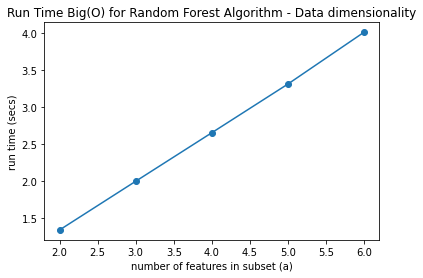

In [77]:
# Create the Big O plot for number of features as the input 

n_features = [i for i in range(2,7)]  

plt.xlabel('number of features in subset (a)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for Random Forest Algorithm - Data dimensionality')  
plt.plot(n_features, times_a, 'o-');

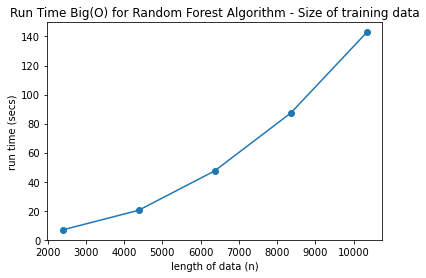

In [78]:
# Determine training run times for varied numbers of features in the feature subspace 

# Create a list containing the different training data input sizes 
df_list = [train_df_under_2, train_df_under, train_df_under_3, train_df_under_4, train_df_under_5]      

# Create an empty list for the training run times
times_n = []

# Loop over each dataframe 
for n in df_list:
    
    # Hold the other inputs constant to only see how dataframe input size affects the training run time 
    n_trees = 3
    train_df = n
    n_bootstrap = len(n)
    n_features = 3 
    dt_max_depth = 3
        
    # Make the function (f) equal to the random forest algorithm function and state its inputs 
    # Record the times across different sizes of dataframe inputs
    # For each dataframe record the times only once because the loop takes a long time to run 
    # Append the times into the empty list 
    
    f = partial(random_forest_algorithm,train_df,n_trees,n_bootstrap,n_features,dt_max_depth) 
    time = min(repeat(f,number=1))/1                                       
    times_n.append(time)


# Create the Big O plot for length of data as the input 

lengthOfData = [len(train_df_under_2), len(train_df_under), len(train_df_under_3), len(train_df_under_4),len(train_df_under_5)] 

plt.xlabel('length of data (n)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for Random Forest Algorithm - Size of training data')  
plt.plot(lengthOfData, times_n, 'o-');

In [79]:
# Determine training run times for varied numbers of decision trees in the forest 

# Create a list containing the different tree input sizes 
n_trees = [i for i in range(2,7)]        

# Create an empty list for the training run times
times_k = []

# Loop over the number of trees in the range 
for i in n_trees:
    
    # Hold the other inputs constant to only see how the number of trees affects the training run time 
    n_trees = i
    train_df = train_df_under
    n_bootstrap = 800
    n_features = 3 
    dt_max_depth = 3
    
    # Make the function (f) equal to the random forest algorithm function and state its inputs 
    # Record the times across different number of trees 
    # For each number of trees record three times and take the minimum value 
    # Append the times into the empty list  
    
    f = partial(random_forest_algorithm,train_df,n_trees,n_bootstrap,n_features,dt_max_depth) 
    time = min(repeat(f,number=3))/3                                       
    times_k.append(time)

    print(times_k)

[1.4843182433329882]
[1.4843182433329882, 2.1167915873338643]
[1.4843182433329882, 2.1167915873338643, 2.762256187666935]
[1.4843182433329882, 2.1167915873338643, 2.762256187666935, 3.445783388333439]
[1.4843182433329882, 2.1167915873338643, 2.762256187666935, 3.445783388333439, 4.110352572333189]


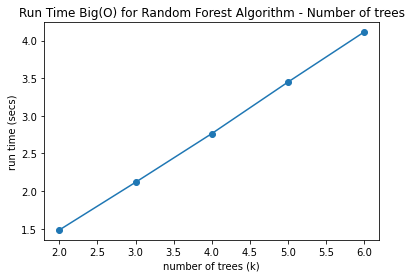

In [80]:
# Create the Big O plot for number of trees as the input 

n_trees = [i for i in range(2,7)] 

plt.xlabel('number of trees (k)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for Random Forest Algorithm - Number of trees')  
plt.plot(n_trees, times_k, 'o-');

#### Big O Plots for Random Forest Predictions: Run time complexity 

In [90]:
# Determine run times for varied sizes of depth of trees in the forest 

# Create a list containing the different depth of tree input sizes 
forest_d = [d for d in range(2,9,2)]  

# Create an empty list for the run times
times_d = []

# Loop over each depth of tree in the range 
for d in forest_d:
    
    # Hold the other inputs constant to only see how the depth of trees affects the run time 
    n_forest = random_forest_algorithm(train_df=train_df_under, n_trees=3, n_bootstrap=800, n_features=3, dt_max_depth=d)
    
    # Make the function (f) equal to the random forest prediction function and state its inputs 
    # Record the times across different sizes of depth of tree 
    # For each depth of tree record the times only once because the loop takes a long time to run 
    # Append the times into the empty list 
    
    f = partial(random_forest_predictions,test_df, n_forest)
    time = min(repeat(f,number=1))/1
    times_d.append(time)
    
print(times_d)

[8.282247497001663, 9.0058860249992, 9.573665897001774, 10.50957924300019]


In [88]:
# Determine run times for varied numbers of decision trees in the forest 

# Create a list containing the different tree input sizes 
forest_k = [k for k in range(2,9,2)]  

# Create an empty list for the run times
times_k_ = []

# Loop over the number of trees in the range 
for k in forest_k:
    
    # Hold the other inputs constant to only see how the number of trees affects the run time 
    n_forest = random_forest_algorithm(train_df=train_df_under, n_trees=k, n_bootstrap=800, n_features=3, dt_max_depth=3)
    
    # Make the function (f) equal to the random forest prediction function and state its inputs 
    # Record the times across different number of trees 
    # For each depth of tree record the times only once because the loop takes a long time to run 
    # Append the times into the empty list 
    
    f = partial(random_forest_predictions,test_df, n_forest)
    time = min(repeat(f,number=1))/1
    times_k_.append(time)
    
print(times_k_)

[13.871893252002337, 15.088330152997514, 16.114964821001195, 17.97147071600193]


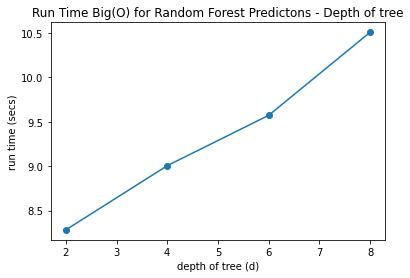

In [91]:
# Create the Big O plot for depth of tree as the input 

forest_d = [d for d in range(2,9,2)]  

plt.xlabel('depth of tree (d)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for Random Forest Predictons - Depth of tree')  
plt.plot(forest_d, times_d, 'o-');

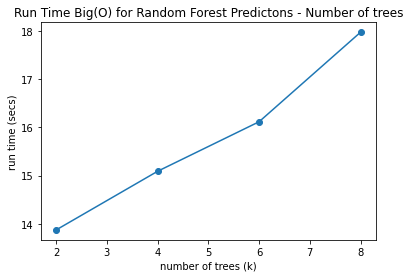

In [89]:
# Create the Big O plot for number of trees as the input 

forest_k = [k for k in range(2,9,2)]    

plt.xlabel('number of trees (k)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for Random Forest Predictons - Number of trees')  
plt.plot(forest_k, times_k_, 'o-');